In [124]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [125]:
# Припустимо, що ми маємо наступні дані:
# X - матриця признаків, де кожен рядок представляє один приклад, а кожен стовпець - одну ознаку
# theta - вектор параметрів моделі, де кожен елемент відповідає ваговому коефіцієнту для кожної ознаки

X = np.array([
    [1, 2, 3],  # Приклад 1
    [1, 4, 5],  # Приклад 2
    [1, 6, 7]   # Приклад 3
])

theta = np.array([0.5, 0.3, 0.2])

def hypothesis(X, theta):
    return np.dot(X, theta)

hypothesis_values = hypothesis(X, theta)

print("Значення гіпотез:", hypothesis_values)

Значення гіпотез: [1.7 2.7 3.7]


In [126]:
# функція для обчислення функції втрат у векторному вигляді
X = np.array([
    [1, 2, 3],
    [1, 4, 5],
    [1, 6, 7]
])
y = np.array([10, 20, 30])
theta = np.array([0.5, 0.3, 0.2])

def compute_cost(X, y, theta):

    m = len(y)
    predictions = np.dot(X, theta)
    sq_errors = (predictions - y) ** 2
    cost = 1.0 / (2 * m) * np.sum(sq_errors)
    return cost

cost = compute_cost(X, y, theta)
print("Функція втрат:", cost)

Функція втрат: 176.645


In [127]:
# Oдин крок градієнтного спуску
def gradient_descent_step(X, y, theta, alpha):
    m = len(y)
    h = hypothesis(X, theta)
    gradient = (1/m) * np.dot(X.T, (h - y))
    theta = theta - alpha * gradient
    return theta

alpha = 0.01  # Швидкість навчання

theta = gradient_descent_step(X, y, theta, alpha)
print("Оновлені параметри моделі:", theta)

Оновлені параметри моделі: [0.673 1.112 1.185]


In [128]:
price_on_houses = pd.read_csv('Housing.csv', index_col=0)
print(price_on_houses.head())

          area  bedrooms  bathrooms  stories mainroad guestroom basement  \
price                                                                      
13300000  7420         4          2        3      yes        no       no   
12250000  8960         4          4        4      yes        no       no   
12250000  9960         3          2        2      yes        no      yes   
12215000  7500         4          2        2      yes        no      yes   
11410000  7420         4          1        2      yes       yes      yes   

         hotwaterheating airconditioning  parking prefarea furnishingstatus  
price                                                                        
13300000              no             yes        2      yes        furnished  
12250000              no             yes        3       no        furnished  
12250000              no              no        2      yes   semi-furnished  
12215000              no             yes        3      yes        furnished  

In [130]:
df_slice = price_on_houses.sort_values(by="price", axis=0, ascending=False)
df_slice.reset_index(inplace=True, drop=False)
df_slice

,price,area,bathrooms,bedrooms
0,13300000,7420,2,4
1,12250000,9960,2,3
2,12250000,8960,4,4
3,12215000,7500,2,4
4,11410000,7420,1,4
...,...,...,...,...
540,1820000,3000,1,2
541,1767150,2400,1,3
542,1750000,3620,1,2
543,1750000,2910,1,3


In [137]:
train_data, test_data = train_test_split(df_slice, shuffle=True, test_size=0.25, random_state=42)
train_data.head()

,price,area,bathrooms,bedrooms
167,5285000,4600,2,2
368,3675000,5640,1,2
301,4200000,5040,1,3
527,2275000,1836,1,2
382,3570000,4500,1,2


In [138]:
print(f'All data - {len(df_slice)}')
print(f'Train data - {len(train_data)}')
print(f'Test data - {len(test_data)}')

All data - 545
Train data - 408
Test data - 137


In [121]:

X_train = train_data[['area', 'bathrooms', 'bedrooms']].to_numpy()
y_train = train_data['price'].to_numpy()
X_test = test_data[['area', 'bathrooms', 'bedrooms']].to_numpy()
y_test = test_data['price'].to_numpy()

# Лінійна регресія з використанням градієнтного спуску

model = LinearRegression().fit(X_train, y_train)

In [144]:
train_data["predictions"] = model.predict(X_train)

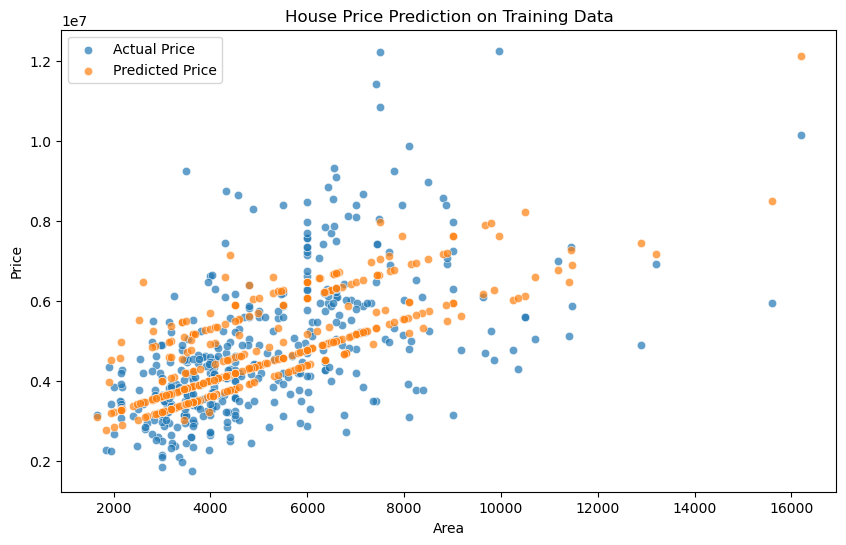

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=y_train, label='Actual Price', alpha=0.7)
sns.scatterplot(x=X_train[:, 0], y=train_data["predictions"], label='Predicted Price', alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Price Prediction on Training Data')
plt.legend()
plt.show()

In [146]:
# Прогнозування на тестових даних
test_data["test_predictions"] = model.predict(X_test)

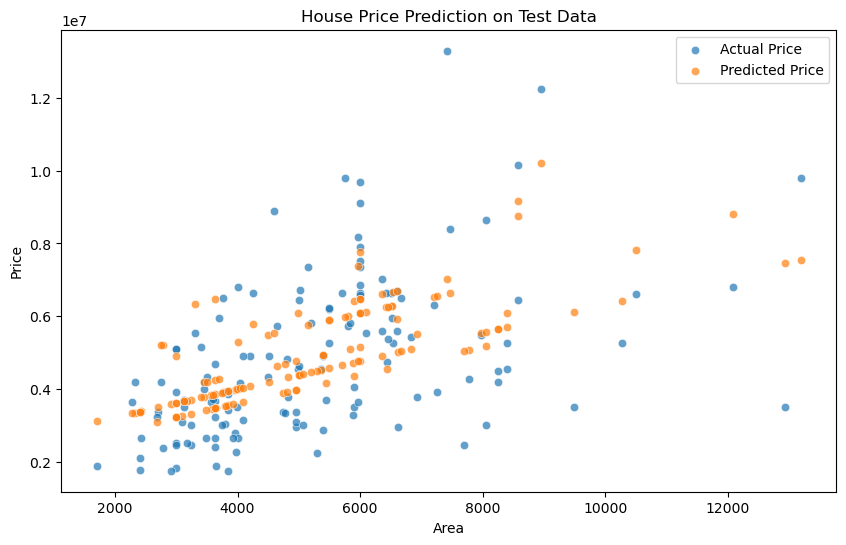

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=y_test, label='Actual Price', alpha=0.7)
sns.scatterplot(x=X_test[:, 0], y=test_data["test_predictions"], label='Predicted Price', alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Price Prediction on Test Data')
plt.legend()
plt.show()

In [150]:
# Оцінка моделі
mse = mean_squared_error(y_test, test_data["test_predictions"])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2413911790568.0366


In [152]:
# Додавання одиниці для відповідного коефіцієнта
X = np.array(train_data[['area', 'bathrooms', 'bedrooms']])
X = np.hstack((np.ones((X.shape[0], 1)), X))
Y = np.array(train_data['price'])

# Розв'язок системи лінійних рівнянь
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print(w)
# Прогнозування на тестових даних
predictions = X.dot(w)
print(predictions)

[-2.06427783e+04  3.87072219e+02  1.30508633e+06  3.88189242e+05]
[ 5146440.56749702  4243909.34970882  4399855.26002439  2771486.62678895
  3802647.01949624  4647581.48049461  4577908.48098736  5196107.00964122
  3582015.85438995  6239101.24896561  3717491.1312096   7265306.706733
  7884113.9876389   3763939.79754777  3222038.69026916  3563779.2659374
  4522601.34773781  3842471.2639664   5972485.49365404  6673739.15731019
  5023041.53339479  6262325.5821347   5322635.43127596  4191953.28402434
  7154361.65586004  3415574.80001152  5166911.20099294  5220448.365332
  3624593.79853327  4728402.57045352  5158516.81021444  6172646.0252644
  6024441.55933852  3285087.2679084   4790798.20170396  7625936.8172426
  4508235.48148011  7160333.13133924  7044211.46549383  3861824.87494063
  7170175.32901329  5887982.55175621  4026330.56822164  3807634.76421277
  3384609.02245274  6464720.15878844  5235931.25411139  5778949.38391168
  3807634.76421277  5519146.92072404  2834966.47078444  3377210.4

In [153]:
# Оцінка моделі
mse = mean_squared_error(Y, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1586759713421.633
